# Karimi Zayan - CS Assignment 2

1. [Imports](#Imports)
2. [Task 1](#Task-1)
3. [Task 2](#Task-2)
4. [Task 3](#Task-3)

# Imports

In [1]:
from random import randint, random, sample, choice, choices
from time import time
from math import floor
import enum
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1
1. [Playable Simulation](#Playable-Simulation)
2. [Playable Simulation Test](#Playable-Simulation-Test)

## Playable Simulation

In [2]:
def mastermind_simulation():
    code_length = int(input("ELECTRONIC MASTERMIND 1977\nSELECT CODE TYPE: [3, 4, 5]: "))
    solution_list = []
    guess_count = 0
    solved = False
    
    #generating code
    for i in range(code_length):
        solution_list.append(randint(0,9))
    
    #game loop
    while not solved:
        #taking in the input
        guess_list_string = input("\nEnter the code separated by space: ").split(" ")
        guess_list = []
        output_list = ["." for i in range(code_length)]
        
        #The code is of an incorrect length
        if len(guess_list_string) != code_length:
            print("Incorrect code length, please try again")
            continue
        
        #The code has letters, words or numbers smaller than 0 and greater than 9
        try:
            #converting the values to numbers
            for i in guess_list_string:
                temp_number = int(i)
                assert(0 <= temp_number and temp_number <= 9)
                guess_list.append(temp_number)
        except:
            print("Incorrect code format, please try again")
            continue
        
        '''
        Essentially if the guess and solution are the same position and char, mark it as B
        if the guess and solution are at different positions, then mark is with 'W' if it is not marked 'W' or 'B'
        '''
        for i in range(code_length):
            if solution_list[i] == guess_list[i]:
                output_list[i] = 'B'
            else:
                for j in range(code_length):
                    if (i != j) and (solution_list[i] == guess_list[j]):
                        if output_list[j] == '.':
                            output_list[j] = 'W'
                            break
                            
        black_pins = output_list.count("B")
        white_pins = output_list.count("W")
        guess_count += 1
        
        print("Guess " + str(guess_count) + ": " + str(black_pins) + " " + str(white_pins) + " " + str(output_list))
        
        if(black_pins == code_length):
            solved = True
    print("\nSOLVED: " + str(solution_list))

## Playable Simulation Test

In [3]:
mastermind_simulation()

ELECTRONIC MASTERMIND 1977
SELECT CODE TYPE: [3, 4, 5]: 3

Enter the code separated by space: 0 1 2
Guess 1: 1 1 ['B', '.', 'W']

Enter the code separated by space: 3 4 5
Guess 2: 0 0 ['.', '.', '.']

Enter the code separated by space: 6 7 8
Guess 3: 0 1 ['W', '.', '.']

Enter the code separated by space: 0 2 6
Guess 4: 3 0 ['B', 'B', 'B']

SOLVED: [0, 2, 6]


# Task 2

1. [Genetic Algorithm Implementation](#Genetic-Algorithm-Implementation)

2. [GA Test](#GA-Test)

## Genetic Algorithm Implementation

The algorithm is a direct implementation of the algorithm in the paper. Essentially, there is a genetic algorithm for every gas. Hence, there are multiple graphs. The fitness function is minimizing. The first guess is predetermined, hence there is no GA for the first guess

In [5]:
from random import randint, random, sample, choice, choices
from time import time
from math import floor
import enum

'''
Crossover type enum
-one_point for single point crossover
-two_point for double point crossover
'''
class crossover_type(enum.Enum):
    one_point = 0
    two_point = 1

'''
Selection type enum
-roulette_wheel for roulette wheel selection
-tournament_selection for k tournament_selection
'''
class selection_type(enum.Enum):
    roulette_wheel = 0
    tournament_selection = 1

    
'''
MAIN GENETIC ALGORITHM CLASS
show_printout: shows the print
show_fitness: shows the graphs of each GA's average fitness
code_length: length of the solution code
population_size: the size of the population
mutation_rate: the probability a color at a randomly chosen position is replaced by another
permutation_rate: the probability the colors of 2 random positions are flipped
inversion_rate: the probability two positions are randomly picked, and the sequence of colors between these positions is inverted
crossover_rate: rate of crossover
elitsm_rate: rate of elitism
max_gen: the maximum generations per guess
max_eligible: the maximum eligible members per guess
crossover_method: the method for crossover
selection_method: the method for selection
k: k-value for tournament selection, if it is chosen, set to 20% of the population size for invalid input
fitness_func_a: coefficient for fitness function
fitness_func_b: coefficient for fitness function
'''
class genetic_algorithm:
    def __init__(self,
                 show_printout = False,
                 show_fitness = False,
                 code_length = 5, 
                 population_size = 50,
                 mutation_rate = 0.1,
                 permutation_rate = 0.03,
                 inversion_rate = 0.02,
                 crossover_rate = 0.8,
                 elitism_rate = 0.5,
                 max_gen = 30,
                 max_eligible = 10,
                 crossover_method = crossover_type.one_point,
                 selection_method = selection_type.roulette_wheel,
                 k = -1,
                 fitness_func_a = 1,
                 fitness_func_b = 0):
        self.show_printout = show_printout
        self.show_fitness = show_fitness
        self.code_length = code_length
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.permutation_rate = permutation_rate
        self.inversion_rate = inversion_rate
        self.crossover_rate = crossover_rate
        self.elitism_rate = elitism_rate
        self.max_gen = max_gen
        self.max_eligible = max_eligible
        self.crossover_method = crossover_method
        self.selection_method = selection_method
        self.k = k
        if(self.k < 1 or self.k > self.population_size):
            self.k = floor(self.population_size * 0.2)
        self.fitness_func_a = fitness_func_a
        self.fitness_func_b = fitness_func_b
        
        '''
        guess_list: list of guesses
        output_list: list of ouputs
        solution: solution for mastermind
        guess_count: number of guesses so far
        total_generations: to count the total number of generations
        total_time: total time required to complete the 
        '''
        self.guess_list = []
        self.output_list = []
        self.eligible_bag = set()
        self.solution = [randint(0,9) for i in range(code_length)]
        self.guess_count = 0
        self.total_generations = 0
        self.avg_fitness_lists = []
        
        #Main printout
        if (self.show_printout):
            print("ELECTRONIC MASTERMIND 1977 GENETIC ALGORITHM SOLVER")
            print("Population size: " + str(self.population_size))
            print("Max Generation: " + str(self.max_gen))
            print("Mutation rate: " + str(self.mutation_rate))
            print("Inversion rate: " + str(self.inversion_rate))
            print("Permutation rate: " + str(self.permutation_rate))
            print("Elitism: " + str(bool(self.elitism_rate)))
            print("Elitism rate: " + str(self.elitism_rate))
            print("code type: " + str(self.code_length) + "\n")
            
        #game loop
        start_time_global = time()
        self.game_loop()
        self.total_time = time() - start_time_global
        
    #converts the chromosome to a string to make it a hashable type
    def as_string(self,
                  chromosome):
        return "".join([str(i) for i in chromosome])
    
    #converts the string of a chromosome back to a chromosome, making it unhashable
    def as_list(self,
                chromosome_string):
        return [int(i) for i in chromosome_string]
    
    #This function is used to get the output code e.g. [".", ".", ".", "B", "W"]
    def comparison(self,
                   guess,
                   solution):
        output = ["." for i in range(self.code_length)]
        for i in range(self.code_length):
            if solution[i] == guess[i]:
                output[i] = 'B'
            else:
                for j in range(self.code_length):
                    if (i != j) and (solution[i] == guess[j]):
                        if output[j] == '.':
                            output[j] = 'W'
                            break
        return output
    
    #fitness function
    #returns eligibility(based on the paper), fitness for a given chromosome
    def fitness_function(self,
                         chromosome):
        is_eligible = False
        fitness = 0
        for i in range(self.guess_count):
            output_chromosome_guess = self.comparison(chromosome, self.guess_list[i])
            fitness += abs(self.fitness_func_a * (output_chromosome_guess.count("B") - self.output_list[i].count("B")))
            fitness += abs(output_chromosome_guess.count("W") - self.output_list[i].count("W"))
        if (fitness == 0):
            is_eligible = True
        fitness += self.fitness_func_b * self.code_length * (self.guess_count)
        return [is_eligible, fitness]
    
    #crossover
    #one point or two point crossover
    def crossover(self,
                  parent1,
                  parent2):
        if(random() < self.crossover_rate):
            child1 = []
            child2 = []
            if(self.crossover_method == crossover_type.one_point):
                point = randint(1, self.code_length - 1)
                child1 = parent1[:point] + parent2[point:]
                child2 = parent2[:point] + parent1[point:]
            elif(self.crossover_method == crossover_type.two_point):
                point1, point2 = sorted(sample([i for i in range(1, self.code_length)], 2))
                child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
                child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
            return choice([child1, child2])
        else:
            return choice([parent1, parent2])
    
    #mutation
    def mutation(self,
                 chromosome):
        chromosome = chromosome.copy()
        if(random() < self.mutation_rate):
            chromosome[randint(1, self.code_length - 1)] = randint(0,9)
        return chromosome
    
    #inversion
    def inversion(self,
                  chromosome):
        chromosome = chromosome.copy()
        if(random() < self.inversion_rate):
            point1, point2 = sorted(sample([i for i in range(0, self.code_length+1)], 2))
            chromosome = chromosome[:point1] + chromosome[point1:point2][::-1] + chromosome[point2:]
        return chromosome
    
    #permutation
    def permutation(self,
                    chromosome):
        chromosome = chromosome.copy()
        if(random() < self.inversion_rate):
            point1, point2 = sorted(sample([i for i in range(0, self.code_length)], 2))
            chromosome[point1], chromosome[point2] = chromosome[point2], chromosome[point1]
        return chromosome
    
    #function to evealuate an entire populations fitness
    def evaluate_population_fitness(self, population):
        score = []
        eligible_bag_temp = set()
        for i in population:
            is_eligible, fitness_value = self.fitness_function(i)
            score.append(fitness_value)
            if is_eligible:
                eligible_bag_temp.add(self.as_string(i))
        return [eligible_bag_temp, score]
    
    #selection
    #roulette wheel or tournament selection
    def pick_one(self, 
                 population, 
                 probability_distribution):
        if(self.selection_method == selection_type.roulette_wheel):
            #invert probability disribution to bias results with the smallest scores
            new_prob_dis = [max(probability_distribution)*1.01 - i for i in probability_distribution]
            return choices(population, new_prob_dis)[0]
        elif(self.selection_method == selection_type.tournament_selection):
            k_competitors = sample(list(zip(population, probability_distribution)), self.k)
            best_chromosome = min(k_competitors, key = lambda x : x[1])
            return best_chromosome[0]
            
    #main game loop
    def game_loop(self):
        #doing the initial guess [0,1,2], [0,1,2,3] or [0,1,2,3,4]
        initial_guess = [i for i in range(0, self.code_length)]
        if self.show_printout: print("GA:", initial_guess)
        self.guess_list.append(initial_guess)
        self.guess_count += 1
        
        #calculating the intial output
        initial_output = self.comparison(initial_guess, self.solution)
        if self.show_printout: print("Guess", str(self.guess_count) + ":", initial_output.count("B"), initial_output.count("W"), initial_output)
        self.output_list.append(initial_output)
        
        #unsolved_flag for game_loop
        unsolved_flag = True
        
        #main game loop
        while(unsolved_flag):
            
            #generating the first population for a guess
            avg_fitness_list = []
            start_time = time()
            first_population = [[randint(0,9) for i in range(self.code_length)] for i in range(self.population_size)]
            eligible_bag, first_population_fitness = self.evaluate_population_fitness(first_population)
            end_time = time()
            if self.show_printout: 
                print("\nGEN # 1")
                print("Average Fitness:", sum(first_population_fitness)/len(first_population_fitness))
                print("Elapsed Time:", end_time - start_time)
            avg_fitness_list.append(sum(first_population_fitness)/len(first_population_fitness))
            
            #calculating the global best
            global_best_index = min(zip(first_population_fitness, range(len(first_population_fitness))))[1]
            global_best = first_population[global_best_index]
            global_best_score = first_population_fitness[global_best_index]
            
            #placing the list in populations
            populations = [first_population]
            scores = [first_population_fitness]
            gen_count = 1
            
            #performing GA tasks
            while(gen_count < self.max_gen and len(eligible_bag) < self.max_eligible):  
                
                #increasing generation count and retrieving previous populations
                gen_count += 1
                previous_population = populations[-1]
                previous_scores = scores[-1]
                
                #getting the population size and creating the new_population list
                start_time = time()
                new_population = []
                #local_population_size is the size of the population whcih will undergo crossover
                local_population_size = self.population_size
                
                #selecting the elites
                #number of elites is equal to the local population size multiplied by the elitism rate
                if(self.elitism_rate):
                    previous_scores, previous_population = zip(*sorted(zip(previous_scores, previous_population)))
                    previous_scores = list(previous_scores)
                    previous_population = list(previous_population)
                    number_of_elites = floor(local_population_size * self.elitism_rate)
                    new_population = previous_population[:number_of_elites]
                    
                    #decreasing the size of the population which will undergo crossover
                    local_population_size -= number_of_elites
                    previous_population = previous_population[number_of_elites:]
                    previous_scores = previous_scores[number_of_elites:]
                
                #crossover
                for i in range(local_population_size):
                    parent1 = self.pick_one(previous_population, previous_scores).copy()
                    parent2 = self.pick_one(previous_population, previous_scores).copy()
                    child = self.crossover(parent1, parent2)
                    mutated_child = self.inversion(self.permutation(self.mutation(child)))
                    new_population.append(mutated_child)
                
                #evaluation of population fitness
                eligible_bag_temp, new_population_fitness = self.evaluate_population_fitness(new_population)
            
                # picking the best chromosome and storing them in the case of no eligible options
                local_best_index = min(zip(new_population_fitness, range(len(new_population_fitness))))[1]
                if(new_population_fitness[local_best_index] < global_best_score):
                    global_best = new_population[local_best_index]
                    global_best_score = new_population_fitness[local_best_index]
                
                #adding the new eligible chromosomes to the total bag
                eligible_bag = eligible_bag.union(eligible_bag_temp)
                end_time = time()
                if self.show_printout:
                    print("\nGEN #", gen_count)
                    print("Average Fitness:", sum(new_population_fitness)/len(new_population_fitness))
                    print("Elapsed Time:", end_time - start_time)
                avg_fitness_list.append(sum(new_population_fitness)/len(new_population_fitness))
                
                #adding the new populations to the population list
                populations.append(new_population)
                scores.append(new_population_fitness)
            
            self.avg_fitness_lists.append(avg_fitness_list)
            self.total_generations += gen_count
            
            #the new guess is the global best or a random eligible chromsome
            if(eligible_bag):
                new_guess = self.as_list(sample(eligible_bag, 1)[0])
            else:
                new_guess = global_best
            
            #guessing
            if self.show_printout: print("\nGA:", new_guess)
            self.guess_list.append(new_guess)
            self.guess_count += 1
            new_output = self.comparison(new_guess, self.solution)
            if self.show_printout: print("Guess", str(self.guess_count) + ":", new_output.count("B"), new_output.count("W"), new_output)
            self.output_list.append(new_output)
            
            #checking if solved
            if(new_output.count("B") == self.code_length):
                unsolved_flag = False
        if self.show_printout: print("SOLVED:", new_guess)
        if self.show_fitness:
            
            fig, ax = plt.subplots(self.guess_count - 1,figsize=(4,5 * (self.guess_count - 1)))
            for i in range(self.guess_count - 1):
                ax[i].plot(self.avg_fitness_lists[i])
                ax[i].title.set_text("Guess " + str(i+2))
                

## GA Test

ELECTRONIC MASTERMIND 1977 GENETIC ALGORITHM SOLVER
Population size: 50
Max Generation: 30
Mutation rate: 0.1
Inversion rate: 0.02
Permutation rate: 0.03
Elitism: True
Elitism rate: 0.5
code type: 5

GA: [0, 1, 2, 3, 4]
Guess 1: 0 2 ['W', '.', '.', '.', 'W']

GEN # 1
Average Fitness: 1.38
Elapsed Time: 0.0019998550415039062

GA: [7, 7, 5, 1, 0]
Guess 2: 1 1 ['.', '.', 'W', '.', 'B']

GEN # 1
Average Fitness: 2.66
Elapsed Time: 0.0020024776458740234

GEN # 2
Average Fitness: 2.48
Elapsed Time: 0.0029990673065185547

GEN # 3
Average Fitness: 2.18
Elapsed Time: 0.0020020008087158203

GEN # 4
Average Fitness: 2.02
Elapsed Time: 0.005004405975341797

GEN # 5
Average Fitness: 1.72
Elapsed Time: 0.0019960403442382812

GEN # 6
Average Fitness: 1.7
Elapsed Time: 0.003003358840942383

GEN # 7
Average Fitness: 1.58
Elapsed Time: 0.002996683120727539

GEN # 8
Average Fitness: 1.48
Elapsed Time: 0.0030052661895751953

GEN # 9
Average Fitness: 1.32
Elapsed Time: 0.0029942989349365234

GEN # 10
Avera

C:\Users\Prannaya\AppData\Local\Temp/ipykernel_24964/1059358538.py:330: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  new_guess = self.as_list(sample(eligible_bag, 1)[0])


 26
Average Fitness: 1.6
Elapsed Time: 0.0040018558502197266

GEN # 27
Average Fitness: 1.56
Elapsed Time: 0.0020008087158203125

GEN # 28
Average Fitness: 1.36
Elapsed Time: 0.004998922348022461

GEN # 29
Average Fitness: 1.38
Elapsed Time: 0.002997875213623047

GEN # 30
Average Fitness: 1.1
Elapsed Time: 0.0030035972595214844

GA: [7, 5, 3, 2, 6]
Guess 4: 1 1 ['.', 'B', '.', '.', 'W']

GEN # 1
Average Fitness: 5.62
Elapsed Time: 0.0019986629486083984

GEN # 2
Average Fitness: 5.18
Elapsed Time: 0.005991220474243164

GEN # 3
Average Fitness: 4.88
Elapsed Time: 0.00700068473815918

GEN # 4
Average Fitness: 4.66
Elapsed Time: 0.006002902984619141

GEN # 5
Average Fitness: 4.66
Elapsed Time: 0.005986452102661133

GEN # 6
Average Fitness: 4.48
Elapsed Time: 0.005555152893066406

GEN # 7
Average Fitness: 4.46
Elapsed Time: 0.009215593338012695

GEN # 8
Average Fitness: 4.32
Elapsed Time: 0.008582115173339844

GEN # 9
Average Fitness: 4.26
Elapsed Time: 0.006999015808105469

GEN # 10
Averag

GEN # 7
Average Fitness: 10.7
Elapsed Time: 0.008998632431030273

GEN # 8
Average Fitness: 10.46
Elapsed Time: 0.015447378158569336

GEN # 9
Average Fitness: 10.44
Elapsed Time: 0.017000675201416016

GEN # 10
Average Fitness: 10.28
Elapsed Time: 0.021005630493164062

GEN # 11
Average Fitness: 10.28
Elapsed Time: 0.01999068260192871

GEN # 12
Average Fitness: 10.24
Elapsed Time: 0.015004873275756836

GEN # 13
Average Fitness: 10.44
Elapsed Time: 0.04500150680541992

GEN # 14
Average Fitness: 10.46
Elapsed Time: 0.01900029182434082

GEN # 15
Average Fitness: 10.4
Elapsed Time: 0.02099895477294922

GEN # 16
Average Fitness: 10.12
Elapsed Time: 0.01600027084350586

GEN # 17
Average Fitness: 10.16
Elapsed Time: 0.009998083114624023

GEN # 18
Average Fitness: 10.0
Elapsed Time: 0.012993574142456055

GEN # 19
Average Fitness: 10.24
Elapsed Time: 0.015004158020019531

GEN # 20
Average Fitness: 9.96
Elapsed Time: 0.01000213623046875

GEN # 21
Average Fitness: 9.58
Elapsed Time: 0.01700854301452


GEN # 16
Average Fitness: 22.28
Elapsed Time: 0.02600550651550293

GEN # 17
Average Fitness: 22.0
Elapsed Time: 0.015008211135864258

GEN # 18
Average Fitness: 21.8
Elapsed Time: 0.025995492935180664

GEN # 19
Average Fitness: 21.5
Elapsed Time: 0.01400136947631836

GEN # 20
Average Fitness: 21.54
Elapsed Time: 0.020998716354370117

GEN # 21
Average Fitness: 21.58
Elapsed Time: 0.014998912811279297

GEN # 22
Average Fitness: 21.68
Elapsed Time: 0.01799488067626953

GEN # 23
Average Fitness: 21.34
Elapsed Time: 0.010998964309692383

GEN # 24
Average Fitness: 21.52
Elapsed Time: 0.013994693756103516

GEN # 25
Average Fitness: 21.28
Elapsed Time: 0.02300119400024414

GEN # 26
Average Fitness: 21.02
Elapsed Time: 0.016998767852783203

GEN # 27
Average Fitness: 21.02
Elapsed Time: 0.013998031616210938

GEN # 28
Average Fitness: 20.84
Elapsed Time: 0.014998912811279297

GEN # 29
Average Fitness: 20.9
Elapsed Time: 0.02000260353088379

GEN # 30
Average Fitness: 20.74
Elapsed Time: 0.01800584


GEN # 23
Average Fitness: 27.9
Elapsed Time: 0.026004791259765625

GEN # 24
Average Fitness: 27.78
Elapsed Time: 0.02299213409423828

GEN # 25
Average Fitness: 27.52
Elapsed Time: 0.02300715446472168

GEN # 26
Average Fitness: 27.56
Elapsed Time: 0.02599167823791504

GEN # 27
Average Fitness: 27.78
Elapsed Time: 0.02999734878540039

GEN # 28
Average Fitness: 27.78
Elapsed Time: 0.02700066566467285

GEN # 29
Average Fitness: 27.2
Elapsed Time: 0.03499889373779297

GEN # 30
Average Fitness: 26.12
Elapsed Time: 0.035997629165649414

GA: [6, 5, 8, 4, 7]
Guess 17: 3 0 ['B', 'B', '.', 'B', '.']

GEN # 1
Average Fitness: 43.32
Elapsed Time: 0.02700209617614746

GEN # 2
Average Fitness: 42.92
Elapsed Time: 0.027995586395263672

GEN # 3
Average Fitness: 41.88
Elapsed Time: 0.025000572204589844

GEN # 4
Average Fitness: 41.94
Elapsed Time: 0.022995471954345703

GEN # 5
Average Fitness: 40.18
Elapsed Time: 0.02700042724609375

GEN # 6
Average Fitness: 38.5
Elapsed Time: 0.02399611473083496

GEN 


GEN # 27
Average Fitness: 32.88
Elapsed Time: 0.027996540069580078

GEN # 28
Average Fitness: 32.3
Elapsed Time: 0.03553509712219238

GEN # 29
Average Fitness: 32.74
Elapsed Time: 0.03401541709899902

GEN # 30
Average Fitness: 32.9
Elapsed Time: 0.03199291229248047

GA: [0, 5, 8, 4, 0]
Guess 21: 3 0 ['.', 'B', '.', 'B', 'B']

GEN # 1
Average Fitness: 59.54
Elapsed Time: 0.025999069213867188

GEN # 2
Average Fitness: 58.26
Elapsed Time: 0.033994436264038086

GEN # 3
Average Fitness: 57.56
Elapsed Time: 0.020999431610107422

GEN # 4
Average Fitness: 56.92
Elapsed Time: 0.03200268745422363

GEN # 5
Average Fitness: 56.5
Elapsed Time: 0.029003620147705078

GEN # 6
Average Fitness: 55.36
Elapsed Time: 0.029003620147705078

GEN # 7
Average Fitness: 54.28
Elapsed Time: 0.03052663803100586

GEN # 8
Average Fitness: 52.78
Elapsed Time: 0.03199911117553711

GEN # 9
Average Fitness: 52.38
Elapsed Time: 0.03399395942687988

GEN # 10
Average Fitness: 51.3
Elapsed Time: 0.03099799156188965

GEN # 1

GEN # 27
Average Fitness: 37.52
Elapsed Time: 0.017998218536376953

GEN # 28
Average Fitness: 34.92
Elapsed Time: 0.022002696990966797

GEN # 29
Average Fitness: 34.18
Elapsed Time: 0.026019811630249023

GEN # 30
Average Fitness: 33.84
Elapsed Time: 0.031010150909423828

GA: [6, 5, 9, 4, 7]
Guess 25: 4 0 ['B', 'B', 'B', 'B', '.']

GEN # 1
Average Fitness: 77.26
Elapsed Time: 0.026996374130249023

GEN # 2
Average Fitness: 76.2
Elapsed Time: 0.03300070762634277

GEN # 3
Average Fitness: 74.72
Elapsed Time: 0.03699660301208496

GEN # 4
Average Fitness: 72.42
Elapsed Time: 0.03300333023071289

GEN # 5
Average Fitness: 71.88
Elapsed Time: 0.030996322631835938

GEN # 6
Average Fitness: 71.02
Elapsed Time: 0.026999950408935547

GEN # 7
Average Fitness: 69.92
Elapsed Time: 0.022997617721557617

GEN # 8
Average Fitness: 69.8
Elapsed Time: 0.030998945236206055

GEN # 9
Average Fitness: 68.26
Elapsed Time: 0.029001951217651367

GEN # 10
Average Fitness: 67.6
Elapsed Time: 0.022998809814453125

GE


GEN # 2
Average Fitness: 89.04
Elapsed Time: 0.03899812698364258

GEN # 3
Average Fitness: 87.26
Elapsed Time: 0.042001962661743164

GEN # 4
Average Fitness: 85.5
Elapsed Time: 0.03699779510498047

GEN # 5
Average Fitness: 83.66
Elapsed Time: 0.047002315521240234

GEN # 6
Average Fitness: 81.54
Elapsed Time: 0.0420079231262207

GEN # 7
Average Fitness: 80.46
Elapsed Time: 0.046000003814697266

GEN # 8
Average Fitness: 80.12
Elapsed Time: 0.057984113693237305

GEN # 9
Average Fitness: 79.56
Elapsed Time: 0.04399991035461426

GEN # 10
Average Fitness: 78.64
Elapsed Time: 0.045012474060058594

GEN # 11
Average Fitness: 76.08
Elapsed Time: 0.04199790954589844

GEN # 12
Average Fitness: 74.06
Elapsed Time: 0.03199481964111328

GEN # 13
Average Fitness: 73.74
Elapsed Time: 0.03300070762634277

GEN # 14
Average Fitness: 72.52
Elapsed Time: 0.03799557685852051

GEN # 15
Average Fitness: 70.36
Elapsed Time: 0.033997297286987305

GEN # 16
Average Fitness: 68.7
Elapsed Time: 0.027001619338989258


GEN # 2
Average Fitness: 96.66
Elapsed Time: 0.03099536895751953

GEN # 3
Average Fitness: 94.94
Elapsed Time: 0.030000686645507812

GEN # 4
Average Fitness: 91.26
Elapsed Time: 0.03299832344055176

GEN # 5
Average Fitness: 92.68
Elapsed Time: 0.035006046295166016

GEN # 6
Average Fitness: 89.1
Elapsed Time: 0.044003963470458984

GEN # 7
Average Fitness: 87.84
Elapsed Time: 0.032010793685913086

GEN # 8
Average Fitness: 85.38
Elapsed Time: 0.045001983642578125

GEN # 9
Average Fitness: 84.52
Elapsed Time: 0.039999961853027344

GEN # 10
Average Fitness: 85.36
Elapsed Time: 0.051009178161621094

GEN # 11
Average Fitness: 83.86
Elapsed Time: 0.040999650955200195

GEN # 12
Average Fitness: 84.88
Elapsed Time: 0.042998552322387695

GEN # 13
Average Fitness: 83.5
Elapsed Time: 0.032999515533447266

GEN # 14
Average Fitness: 82.12
Elapsed Time: 0.02899622917175293

GEN # 15
Average Fitness: 79.9
Elapsed Time: 0.03299856185913086

GEN # 16
Average Fitness: 79.0
Elapsed Time: 0.031003475189208


GEN # 7
Average Fitness: 103.14
Elapsed Time: 0.026999235153198242

GEN # 8
Average Fitness: 101.58
Elapsed Time: 0.03862309455871582

GEN # 9
Average Fitness: 99.68
Elapsed Time: 0.03754782676696777

GEN # 10
Average Fitness: 97.26
Elapsed Time: 0.036994218826293945

GEN # 11
Average Fitness: 95.68
Elapsed Time: 0.02754521369934082

GEN # 12
Average Fitness: 96.12
Elapsed Time: 0.03399968147277832

GEN # 13
Average Fitness: 98.28
Elapsed Time: 0.043000221252441406

GEN # 14
Average Fitness: 98.62
Elapsed Time: 0.03000164031982422

GEN # 15
Average Fitness: 95.16
Elapsed Time: 0.030632734298706055

GEN # 16
Average Fitness: 93.32
Elapsed Time: 0.025998592376708984

GEN # 17
Average Fitness: 93.2
Elapsed Time: 0.028589963912963867

GEN # 18
Average Fitness: 91.3
Elapsed Time: 0.028963088989257812

GEN # 19
Average Fitness: 90.88
Elapsed Time: 0.026998519897460938

GEN # 20
Average Fitness: 89.7
Elapsed Time: 0.03205990791320801

GEN # 21
Average Fitness: 88.28
Elapsed Time: 0.029941320


GEN # 7
Average Fitness: 117.78
Elapsed Time: 0.037003278732299805

GEN # 8
Average Fitness: 116.08
Elapsed Time: 0.030996084213256836

GEN # 9
Average Fitness: 114.82
Elapsed Time: 0.03900027275085449

GEN # 10
Average Fitness: 115.08
Elapsed Time: 0.03199648857116699

GEN # 11
Average Fitness: 113.86
Elapsed Time: 0.029996395111083984

GEN # 12
Average Fitness: 112.2
Elapsed Time: 0.02500152587890625

GEN # 13
Average Fitness: 111.54
Elapsed Time: 0.022997140884399414

GEN # 14
Average Fitness: 110.34
Elapsed Time: 0.025998830795288086

GEN # 15
Average Fitness: 110.9
Elapsed Time: 0.03400468826293945

GEN # 16
Average Fitness: 110.8
Elapsed Time: 0.028999805450439453

GEN # 17
Average Fitness: 109.94
Elapsed Time: 0.0319981575012207

GEN # 18
Average Fitness: 108.92
Elapsed Time: 0.028001785278320312

GEN # 19
Average Fitness: 109.18
Elapsed Time: 0.029998779296875

GEN # 20
Average Fitness: 108.48
Elapsed Time: 0.034006357192993164

GEN # 21
Average Fitness: 107.76
Elapsed Time: 0


GEN # 12
Average Fitness: 120.56
Elapsed Time: 0.027008533477783203

GEN # 13
Average Fitness: 116.58
Elapsed Time: 0.027004718780517578

GEN # 14
Average Fitness: 111.6
Elapsed Time: 0.03493833541870117

GEN # 15
Average Fitness: 109.62
Elapsed Time: 0.028998851776123047

GEN # 16
Average Fitness: 109.76
Elapsed Time: 0.02999258041381836

GEN # 17
Average Fitness: 103.94
Elapsed Time: 0.02700066566467285

GEN # 18
Average Fitness: 101.8
Elapsed Time: 0.028996944427490234

GEN # 19
Average Fitness: 99.48
Elapsed Time: 0.02699899673461914

GEN # 20
Average Fitness: 98.9
Elapsed Time: 0.028004169464111328

GEN # 21
Average Fitness: 96.78
Elapsed Time: 0.031001806259155273

GEN # 22
Average Fitness: 97.56
Elapsed Time: 0.024997234344482422

GEN # 23
Average Fitness: 93.96
Elapsed Time: 0.024934053421020508

GEN # 24
Average Fitness: 90.04
Elapsed Time: 0.02500128746032715

GEN # 25
Average Fitness: 89.26
Elapsed Time: 0.027003765106201172

GEN # 26
Average Fitness: 86.52
Elapsed Time: 0.


GEN # 13
Average Fitness: 125.72
Elapsed Time: 0.02605915069580078

GEN # 14
Average Fitness: 123.44
Elapsed Time: 0.027942657470703125

GEN # 15
Average Fitness: 122.42
Elapsed Time: 0.028996944427490234

GEN # 16
Average Fitness: 119.42
Elapsed Time: 0.027004241943359375

GEN # 17
Average Fitness: 115.2
Elapsed Time: 0.03000354766845703

GEN # 18
Average Fitness: 112.3
Elapsed Time: 0.033998727798461914

GEN # 19
Average Fitness: 114.58
Elapsed Time: 0.03901386260986328

GEN # 20
Average Fitness: 113.16
Elapsed Time: 0.0360262393951416

GEN # 21
Average Fitness: 109.94
Elapsed Time: 0.0359799861907959

GEN # 22
Average Fitness: 110.78
Elapsed Time: 0.030997753143310547

GEN # 23
Average Fitness: 111.18
Elapsed Time: 0.028000354766845703

GEN # 24
Average Fitness: 109.66
Elapsed Time: 0.029001712799072266

GEN # 25
Average Fitness: 108.9
Elapsed Time: 0.031017303466796875

GEN # 26
Average Fitness: 108.14
Elapsed Time: 0.030992746353149414

GEN # 27
Average Fitness: 104.78
Elapsed Ti


GEN # 12
Average Fitness: 133.14
Elapsed Time: 0.04799604415893555

GEN # 13
Average Fitness: 129.74
Elapsed Time: 0.03299736976623535

GEN # 14
Average Fitness: 127.92
Elapsed Time: 0.03400588035583496

GEN # 15
Average Fitness: 125.58
Elapsed Time: 0.03999972343444824

GEN # 16
Average Fitness: 125.62
Elapsed Time: 0.037998199462890625

GEN # 17
Average Fitness: 125.1
Elapsed Time: 0.042006492614746094

GEN # 18
Average Fitness: 126.56
Elapsed Time: 0.03899741172790527

GEN # 19
Average Fitness: 122.7
Elapsed Time: 0.04200124740600586

GEN # 20
Average Fitness: 121.86
Elapsed Time: 0.03200030326843262

GEN # 21
Average Fitness: 121.78
Elapsed Time: 0.031000137329101562

GEN # 22
Average Fitness: 120.5
Elapsed Time: 0.030009746551513672

GEN # 23
Average Fitness: 120.14
Elapsed Time: 0.029993534088134766

GEN # 24
Average Fitness: 118.5
Elapsed Time: 0.029998302459716797

GEN # 25
Average Fitness: 118.02
Elapsed Time: 0.02900409698486328

GEN # 26
Average Fitness: 115.08
Elapsed Time


GEN # 13
Average Fitness: 158.96
Elapsed Time: 0.029953718185424805

GEN # 14
Average Fitness: 155.34
Elapsed Time: 0.036040306091308594

GEN # 15
Average Fitness: 152.42
Elapsed Time: 0.032964468002319336

GEN # 16
Average Fitness: 151.46
Elapsed Time: 0.03099656105041504

GEN # 17
Average Fitness: 149.02
Elapsed Time: 0.03200364112854004

GEN # 18
Average Fitness: 150.82
Elapsed Time: 0.029994726181030273

GEN # 19
Average Fitness: 147.78
Elapsed Time: 0.029001474380493164

GEN # 20
Average Fitness: 144.7
Elapsed Time: 0.03200101852416992

GEN # 21
Average Fitness: 140.88
Elapsed Time: 0.03300046920776367

GEN # 22
Average Fitness: 137.76
Elapsed Time: 0.029999971389770508

GEN # 23
Average Fitness: 137.08
Elapsed Time: 0.029000282287597656

GEN # 24
Average Fitness: 133.48
Elapsed Time: 0.03400015830993652

GEN # 25
Average Fitness: 134.1
Elapsed Time: 0.0319974422454834

GEN # 26
Average Fitness: 129.28
Elapsed Time: 0.03300333023071289

GEN # 27
Average Fitness: 126.2
Elapsed Tim


GEN # 12
Average Fitness: 151.94
Elapsed Time: 0.03394651412963867

GEN # 13
Average Fitness: 149.54
Elapsed Time: 0.03306317329406738

GEN # 14
Average Fitness: 143.32
Elapsed Time: 0.0339350700378418

GEN # 15
Average Fitness: 145.84
Elapsed Time: 0.03305864334106445

GEN # 16
Average Fitness: 145.08
Elapsed Time: 0.033943891525268555

GEN # 17
Average Fitness: 136.84
Elapsed Time: 0.034000396728515625

GEN # 18
Average Fitness: 131.1
Elapsed Time: 0.0469973087310791

GEN # 19
Average Fitness: 125.7
Elapsed Time: 0.042000770568847656

GEN # 20
Average Fitness: 125.02
Elapsed Time: 0.050003767013549805

GEN # 21
Average Fitness: 126.88
Elapsed Time: 0.03502702713012695

GEN # 22
Average Fitness: 126.94
Elapsed Time: 0.03296542167663574

GEN # 23
Average Fitness: 124.76
Elapsed Time: 0.03300166130065918

GEN # 24
Average Fitness: 119.08
Elapsed Time: 0.03500032424926758

GEN # 25
Average Fitness: 119.56
Elapsed Time: 0.03199934959411621

GEN # 26
Average Fitness: 119.94
Elapsed Time: 


GEN # 11
Average Fitness: 187.2
Elapsed Time: 0.04199576377868652

GEN # 12
Average Fitness: 181.16
Elapsed Time: 0.04099893569946289

GEN # 13
Average Fitness: 177.32
Elapsed Time: 0.041001081466674805

GEN # 14
Average Fitness: 175.3
Elapsed Time: 0.03999900817871094

GEN # 15
Average Fitness: 167.94
Elapsed Time: 0.04399991035461426

GEN # 16
Average Fitness: 169.06
Elapsed Time: 0.04099702835083008

GEN # 17
Average Fitness: 168.52
Elapsed Time: 0.04300355911254883

GEN # 18
Average Fitness: 163.7
Elapsed Time: 0.04099559783935547

GEN # 19
Average Fitness: 163.76
Elapsed Time: 0.042998313903808594

GEN # 20
Average Fitness: 162.96
Elapsed Time: 0.042999982833862305

GEN # 21
Average Fitness: 161.66
Elapsed Time: 0.04300498962402344

GEN # 22
Average Fitness: 157.12
Elapsed Time: 0.05299806594848633

GEN # 23
Average Fitness: 153.52
Elapsed Time: 0.05599522590637207

GEN # 24
Average Fitness: 152.26
Elapsed Time: 0.04199624061584473

GEN # 25
Average Fitness: 151.66
Elapsed Time: 


GEN # 10
Average Fitness: 204.7
Elapsed Time: 0.11909627914428711

GEN # 11
Average Fitness: 200.34
Elapsed Time: 0.08499979972839355

GEN # 12
Average Fitness: 197.28
Elapsed Time: 0.06399750709533691

GEN # 13
Average Fitness: 193.6
Elapsed Time: 0.10500431060791016

GEN # 14
Average Fitness: 193.26
Elapsed Time: 0.1329963207244873

GEN # 15
Average Fitness: 191.0
Elapsed Time: 0.10053300857543945

GEN # 16
Average Fitness: 189.68
Elapsed Time: 0.10500121116638184

GEN # 17
Average Fitness: 188.24
Elapsed Time: 0.09599614143371582

GEN # 18
Average Fitness: 188.44
Elapsed Time: 0.0899958610534668

GEN # 19
Average Fitness: 188.2
Elapsed Time: 0.09400653839111328

GEN # 20
Average Fitness: 184.84
Elapsed Time: 0.10099649429321289

GEN # 21
Average Fitness: 186.74
Elapsed Time: 0.10899949073791504

GEN # 22
Average Fitness: 185.44
Elapsed Time: 0.09199857711791992

GEN # 23
Average Fitness: 182.1
Elapsed Time: 0.08499884605407715

GEN # 24
Average Fitness: 181.34
Elapsed Time: 0.10900


GEN # 9
Average Fitness: 211.6
Elapsed Time: 0.07500553131103516

GEN # 10
Average Fitness: 206.28
Elapsed Time: 0.08099150657653809

GEN # 11
Average Fitness: 203.34
Elapsed Time: 0.08801817893981934

GEN # 12
Average Fitness: 199.32
Elapsed Time: 0.08099198341369629

GEN # 13
Average Fitness: 199.3
Elapsed Time: 0.08600020408630371

GEN # 14
Average Fitness: 198.42
Elapsed Time: 0.06399917602539062

GEN # 15
Average Fitness: 197.1
Elapsed Time: 0.08099889755249023

GEN # 16
Average Fitness: 198.62
Elapsed Time: 0.08700037002563477

GEN # 17
Average Fitness: 194.36
Elapsed Time: 0.08799934387207031

GEN # 18
Average Fitness: 193.68
Elapsed Time: 0.06499981880187988

GEN # 19
Average Fitness: 191.9
Elapsed Time: 0.056000709533691406

GEN # 20
Average Fitness: 189.34
Elapsed Time: 0.05999898910522461

GEN # 21
Average Fitness: 188.04
Elapsed Time: 0.06900167465209961

GEN # 22
Average Fitness: 184.02
Elapsed Time: 0.06799530982971191

GEN # 23
Average Fitness: 185.8
Elapsed Time: 0.070

Average Fitness: 222.0
Elapsed Time: 0.08300662040710449

GEN # 8
Average Fitness: 214.98
Elapsed Time: 0.07599854469299316

GEN # 9
Average Fitness: 213.1
Elapsed Time: 0.1069948673248291

GEN # 10
Average Fitness: 203.68
Elapsed Time: 0.0930023193359375

GEN # 11
Average Fitness: 199.92
Elapsed Time: 0.09598302841186523

GEN # 12
Average Fitness: 197.86
Elapsed Time: 0.08799982070922852

GEN # 13
Average Fitness: 191.4
Elapsed Time: 0.0850069522857666

GEN # 14
Average Fitness: 189.64
Elapsed Time: 0.08799171447753906

GEN # 15
Average Fitness: 191.24
Elapsed Time: 0.07699036598205566

GEN # 16
Average Fitness: 185.8
Elapsed Time: 0.05900406837463379

GEN # 17
Average Fitness: 182.6
Elapsed Time: 0.07000207901000977

GEN # 18
Average Fitness: 180.72
Elapsed Time: 0.07599663734436035

GEN # 19
Average Fitness: 181.78
Elapsed Time: 0.057991981506347656

GEN # 20
Average Fitness: 176.1
Elapsed Time: 0.07999706268310547

GEN # 21
Average Fitness: 175.44
Elapsed Time: 0.08799934387207031



GEN # 6
Average Fitness: 250.26
Elapsed Time: 0.05698847770690918

GEN # 7
Average Fitness: 238.52
Elapsed Time: 0.052999019622802734

GEN # 8
Average Fitness: 240.92
Elapsed Time: 0.051001548767089844

GEN # 9
Average Fitness: 228.84
Elapsed Time: 0.053002119064331055

GEN # 10
Average Fitness: 223.38
Elapsed Time: 0.06399679183959961

GEN # 11
Average Fitness: 217.26
Elapsed Time: 0.06000256538391113

GEN # 12
Average Fitness: 212.48
Elapsed Time: 0.053003549575805664

GEN # 13
Average Fitness: 205.96
Elapsed Time: 0.050992727279663086

GEN # 14
Average Fitness: 202.38
Elapsed Time: 0.05400347709655762

GEN # 15
Average Fitness: 206.56
Elapsed Time: 0.06305313110351562

GEN # 16
Average Fitness: 199.74
Elapsed Time: 0.058035850524902344

GEN # 17
Average Fitness: 191.66
Elapsed Time: 0.060018062591552734

GEN # 18
Average Fitness: 188.12
Elapsed Time: 0.06197381019592285

GEN # 19
Average Fitness: 186.92
Elapsed Time: 0.06300210952758789

GEN # 20
Average Fitness: 179.06
Elapsed Tim


GEN # 4
Average Fitness: 254.46
Elapsed Time: 0.04900312423706055

GEN # 5
Average Fitness: 257.7
Elapsed Time: 0.053000688552856445

GEN # 6
Average Fitness: 251.26
Elapsed Time: 0.04599452018737793

GEN # 7
Average Fitness: 245.9
Elapsed Time: 0.05594778060913086

GEN # 8
Average Fitness: 236.24
Elapsed Time: 0.05500173568725586

GEN # 9
Average Fitness: 236.9
Elapsed Time: 0.05100417137145996

GEN # 10
Average Fitness: 232.98
Elapsed Time: 0.050000905990600586

GEN # 11
Average Fitness: 229.5
Elapsed Time: 0.0509951114654541

GEN # 12
Average Fitness: 226.98
Elapsed Time: 0.049002885818481445

GEN # 13
Average Fitness: 222.2
Elapsed Time: 0.04799818992614746

GEN # 14
Average Fitness: 220.22
Elapsed Time: 0.05199790000915527

GEN # 15
Average Fitness: 213.68
Elapsed Time: 0.045003414154052734

GEN # 16
Average Fitness: 202.32
Elapsed Time: 0.043997764587402344

GEN # 17
Average Fitness: 205.5
Elapsed Time: 0.04799938201904297

GEN # 18
Average Fitness: 199.7
Elapsed Time: 0.0480005


GEN # 4
Average Fitness: 275.38
Elapsed Time: 0.06000113487243652

GEN # 5
Average Fitness: 268.66
Elapsed Time: 0.06100106239318848

GEN # 6
Average Fitness: 265.7
Elapsed Time: 0.06699872016906738

GEN # 7
Average Fitness: 260.08
Elapsed Time: 0.347003698348999

GEN # 8
Average Fitness: 253.68
Elapsed Time: 0.3979980945587158

GEN # 9
Average Fitness: 247.06
Elapsed Time: 0.225999116897583

GEN # 10
Average Fitness: 251.18
Elapsed Time: 0.08199954032897949

GEN # 11
Average Fitness: 245.94
Elapsed Time: 0.06699824333190918

GEN # 12
Average Fitness: 241.52
Elapsed Time: 0.07799553871154785

GEN # 13
Average Fitness: 237.72
Elapsed Time: 0.059005022048950195

GEN # 14
Average Fitness: 236.56
Elapsed Time: 0.061997175216674805

GEN # 15
Average Fitness: 233.96
Elapsed Time: 0.0579984188079834

GEN # 16
Average Fitness: 233.76
Elapsed Time: 0.05499458312988281

GEN # 17
Average Fitness: 228.66
Elapsed Time: 0.052999019622802734

GEN # 18
Average Fitness: 225.22
Elapsed Time: 0.05499982


GEN # 4
Average Fitness: 300.38
Elapsed Time: 0.06099438667297363

GEN # 5
Average Fitness: 288.52
Elapsed Time: 0.05500388145446777

GEN # 6
Average Fitness: 287.48
Elapsed Time: 0.05603337287902832

GEN # 7
Average Fitness: 279.02
Elapsed Time: 0.05396461486816406

GEN # 8
Average Fitness: 278.18
Elapsed Time: 0.05499911308288574

GEN # 9
Average Fitness: 271.08
Elapsed Time: 0.05900001525878906

GEN # 10
Average Fitness: 261.68
Elapsed Time: 0.05499768257141113

GEN # 11
Average Fitness: 258.94
Elapsed Time: 0.0540006160736084

GEN # 12
Average Fitness: 247.72
Elapsed Time: 0.054000139236450195

GEN # 13
Average Fitness: 246.02
Elapsed Time: 0.05299973487854004

GEN # 14
Average Fitness: 245.44
Elapsed Time: 0.05003666877746582

GEN # 15
Average Fitness: 241.3
Elapsed Time: 0.054059505462646484

GEN # 16
Average Fitness: 226.04
Elapsed Time: 0.05394148826599121

GEN # 17
Average Fitness: 219.18
Elapsed Time: 0.0469973087310791

GEN # 18
Average Fitness: 214.58
Elapsed Time: 0.05199

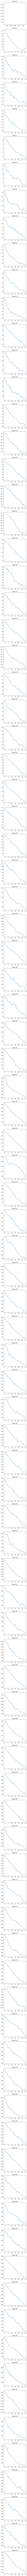

In [6]:
x=genetic_algorithm(show_printout=True, show_fitness=True)

# Task 3

1. [Simulation Code](#Simulation-Code)
2. [Simulation Test](#Simulation-Test)
3. [Question 1](#Question-1)
4. [Question 2](#Question-2)
5. [Question 3](#Question-3)
6. [Question 4](#Question-4)
7. [Question 5](#Question-5)
8. [Question 6](#Question-6)
9. [Conclusion](#Conclusion)


## Simulation Code

In [7]:
def simulation(simulation_size = 100,
               code_length = 5, 
               population_size = 50,
               mutation_rate = 0.1,
               permutation_rate = 0.03,
               inversion_rate = 0.02,
               crossover_rate = 0.8,
               elitism_rate = 0,
               max_gen = 30,
               max_eligible = 10,
               crossover_method = crossover_type.one_point,
               selection_method = selection_type.roulette_wheel,
               k = -1,
               fitness_func_a = 1,
               fitness_func_b = 0):
    guess_count_list = []
    time_list = []
    generation_count_list = []
    for i in range(simulation_size):
        temp = genetic_algorithm(show_printout = False,
                                 show_fitness = False,
                                 code_length = code_length,
                                 population_size = population_size,
                                 mutation_rate = mutation_rate,
                                 permutation_rate = permutation_rate,
                                 inversion_rate = inversion_rate,
                                 crossover_rate = crossover_rate,
                                 elitism_rate = elitism_rate,
                                 max_gen = max_gen,
                                 max_eligible = max_eligible,
                                 crossover_method = crossover_method,
                                 selection_method = selection_method,
                                 k = k,
                                 fitness_func_a = fitness_func_a,
                                 fitness_func_b = fitness_func_b
                                 )
        print("Simulation #" + str(i))
        print("Guess count:", temp.guess_count)
        guess_count_list.append(temp.guess_count)
        print("Time:", temp.total_time)
        time_list.append(temp.total_time)
        print("Total generations", temp.total_generations, "\n")
        generation_count_list.append(temp.total_generations)
    print("Average number of guesses:", sum(guess_count_list)/simulation_size)
    print("Average time:", sum(time_list)/simulation_size)
    print("Average generations:", sum(generation_count_list)/simulation_size)
    return guess_count_list, time_list, generation_count_list

## Simulation Test

In [8]:
_, __, ___ = simulation(simulation_size=10)

Simulation #0
Guess count: 8
Time: 1.054272174835205
Total generations 153 

Simulation #1
Guess count: 6
Time: 0.6981406211853027
Total generations 109 

Simulation #2
Guess count: 9
Time: 1.1716210842132568
Total generations 161 

Simulation #3
Guess count: 7
Time: 0.9700851440429688
Total generations 152 

Simulation #4
Guess count: 8
Time: 0.9854111671447754
Total generations 150 

Simulation #5
Guess count: 13
Time: 2.1499364376068115
Total generations 295 

Simulation #6
Guess count: 12
Time: 1.9912924766540527
Total generations 278 

Simulation #7
Guess count: 12
Time: 2.1164212226867676
Total generations 301 

Simulation #8
Guess count: 10
Time: 1.5063176155090332
Total generations 220 

Simulation #9
Guess count: 11
Time: 1.6275591850280762
Total generations 226 

Average number of guesses: 9.6
Average time: 1.427105712890625
Average generations: 204.5


## Question 1

Which selection method is better, roulette wheel or tournament selection? Roulette wheel involves picking a chromosome based on a weighted probability distribution which is the inverse of the fitness distribution. Tournament Selection involves picking a chromosome by first picking k random chromosomes from a population and then picking the one with the smallest fitness.

In [34]:
rw_guesses, rw_time, rw_generations = simulation(simulation_size = 50)
ts_guesses, ts_time, ts_generations = simulation(simulation_size = 50, selection_method = selection_type.tournament_selection)

Simulation #0
Guess count: 7
Time: 0.5898499488830566
Total generations 91 

Simulation #1
Guess count: 7
Time: 0.8521890640258789
Total generations 132 

Simulation #2
Guess count: 7
Time: 0.6940464973449707
Total generations 107 

Simulation #3
Guess count: 11
Time: 1.620617389678955
Total generations 230 

Simulation #4
Guess count: 7
Time: 0.7961499691009521
Total generations 123 

Simulation #5
Guess count: 9
Time: 1.1239738464355469
Total generations 165 

Simulation #6
Guess count: 10
Time: 1.556978702545166
Total generations 227 

Simulation #7
Guess count: 9
Time: 1.247999906539917
Total generations 186 

Simulation #8
Guess count: 5
Time: 0.2854125499725342
Total generations 47 

Simulation #9
Guess count: 10
Time: 1.4600005149841309
Total generations 215 

Simulation #10
Guess count: 8
Time: 1.0425665378570557
Total generations 155 

Simulation #11
Guess count: 10
Time: 1.328819990158081
Total generations 194 

Simulation #12
Guess count: 7
Time: 0.8258578777313232
Total gen

In [35]:
df_selection = pd.DataFrame([rw_guesses, ts_guesses, rw_time, ts_time, rw_generations, ts_generations]).T
df_selection.columns = ["RW guesses", "TS guesses", "RW time", "TS time", "RW generations", "TS generations"]
df_selection.head()

,RW guesses,TS guesses,RW time,TS time,RW generations,TS generations
0,7.0,9.0,0.589850,0.568548,91.0,193.0
1,7.0,7.0,0.852189,0.357999,132.0,124.0
2,7.0,8.0,0.694046,0.476168,107.0,155.0
3,11.0,9.0,1.620617,0.513477,230.0,158.0
4,7.0,13.0,0.796150,1.049982,123.0,279.0


In [36]:
df_selection.describe()

,RW guesses,TS guesses,RW time,TS time,RW generations,TS generations
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8.320000,9.160000,1.091652,0.616305,161.620000,187.500000
std,2.271743,2.881043,0.531037,0.375897,71.416825,86.507579
min,3.000000,5.000000,0.021277,0.146507,5.000000,54.000000
25%,7.000000,7.000000,0.751593,0.373421,108.500000,129.500000
50%,8.000000,9.000000,1.050326,0.537927,160.000000,168.500000
75%,9.000000,11.000000,1.323558,0.772379,193.750000,233.750000
max,17.000000,20.000000,3.134049,2.200257,409.000000,515.000000


<AxesSubplot:>

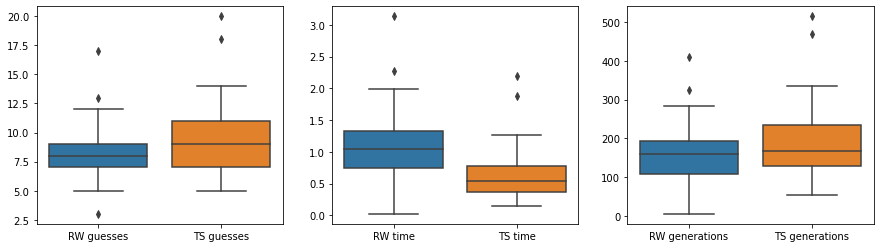

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(ax = axes[0], data=df_selection.iloc[:,:2])
sns.boxplot(ax = axes[1], data=df_selection.iloc[:,2:4])
sns.boxplot(ax = axes[2], data=df_selection.iloc[:,4:])

As we see from the data, roulette wheel selection performs better than torunament selection as it has lower median and mean guesses and generations. However, tournament selection takes significantly less time to carry out as compared to roulette wheel selection. I feel that I may want to explore tournament selection with varying k values as I currently set it to 20% of the population size.

## Question 2

Which crossover method is better, one point or two point crossover? one point crossover generates a chromsome from 2 parents by picking a random point and taking all the data before the point from one parent and taking all the data after the point from the other. two point crossover generates a chromosome from 2 parents by taking 2 points and then the child chromosome is made out of data between the 2 points of one parent and the remaining data is from the other parent.

In [58]:
op_guesses, op_time, op_generations = simulation(simulation_size = 50)
tp_guesses, tp_time, tp_generations = simulation(simulation_size = 50, crossover_method = crossover_type.two_point)

Simulation #0
Guess count: 11
Time: 1.6415143013000488
Total generations 231 

Simulation #1
Guess count: 8
Time: 1.0799593925476074
Total generations 162 

Simulation #2
Guess count: 12
Time: 1.8372960090637207
Total generations 257 

Simulation #3
Guess count: 9
Time: 1.2727034091949463
Total generations 187 

Simulation #4
Guess count: 8
Time: 1.0385890007019043
Total generations 155 

Simulation #5
Guess count: 6
Time: 0.41941046714782715
Total generations 66 

Simulation #6
Guess count: 6
Time: 0.541724681854248
Total generations 85 

Simulation #7
Guess count: 6
Time: 0.40787339210510254
Total generations 64 

Simulation #8
Guess count: 10
Time: 1.5081453323364258
Total generations 218 

Simulation #9
Guess count: 8
Time: 0.9490334987640381
Total generations 140 

Simulation #10
Guess count: 11
Time: 1.6276781558990479
Total generations 228 

Simulation #11
Guess count: 10
Time: 1.3945014476776123
Total generations 199 

Simulation #12
Guess count: 7
Time: 0.8546323776245117
Tota

In [59]:
df_crossover = pd.DataFrame([op_guesses, tp_guesses, op_time, tp_time, op_generations, tp_generations]).T
df_crossover.columns = ["OP guesses", "TP guesses", "OP time", "TP time", "OP generations", "TP generations"]
df_crossover.head()

,OP guesses,TP guesses,OP time,TP time,OP generations,TP generations
0,11.0,11.0,1.641514,1.567147,231.0,210.0
1,8.0,7.0,1.079959,0.845918,162.0,125.0
2,12.0,8.0,1.837296,1.159886,257.0,172.0
3,9.0,8.0,1.272703,1.096771,187.0,158.0
4,8.0,9.0,1.038589,1.183140,155.0,163.0


In [60]:
df_crossover.describe()

,OP guesses,TP guesses,OP time,TP time,OP generations,TP generations
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,8.60000,8.64000,1.151259,1.206885,167.160000,170.580000
std,2.10926,2.00774,0.479177,0.506191,62.502689,65.494069
min,5.00000,5.00000,0.407873,0.412424,64.000000,64.000000
25%,7.00000,7.00000,0.877649,0.896109,132.750000,132.000000
50%,8.00000,9.00000,1.057740,1.146844,157.500000,163.000000
75%,9.75000,9.00000,1.381673,1.404250,199.000000,200.750000
max,14.00000,15.00000,2.532137,2.894336,340.000000,371.000000


<AxesSubplot:>

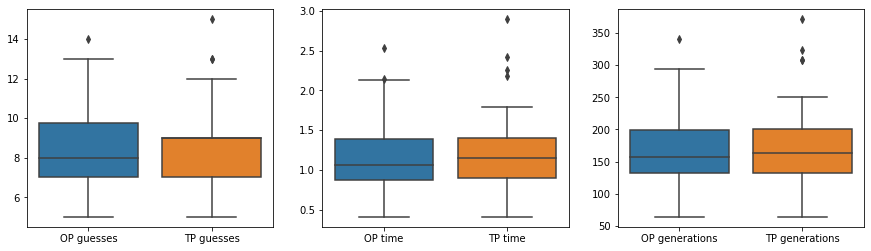

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(ax = axes[0], data=df_crossover.iloc[:,:2])
sns.boxplot(ax = axes[1], data=df_crossover.iloc[:,2:4])
sns.boxplot(ax = axes[2], data=df_crossover.iloc[:,4:])

As we see from the data, one point crossover performs better than two point crossover. We see that the mean and median guesses, generations and time is slightly better for one point as compared to two point. However, a thing to note is that two point crossover has a smaller 

## Question 3

What is the ideal crossover rate, 0.2, 0.4, 0.6, 0.8 or 1.0? crossover rate is the probability crossover happens as compared to readding one parent to the new population.

In [62]:
df_crossover_ideal = pd.DataFrame()
for i in range(1,6):
    guess_temp, time_temp, gen_temp = simulation(simulation_size = 40, crossover_rate=i/5)
    df_crossover_ideal[str(i/5) + " guesses"] = guess_temp
    df_crossover_ideal[str(i/5) + " time"] = time_temp
    df_crossover_ideal[str(i/5) + " generations"] = gen_temp

Simulation #0
Guess count: 10
Time: 1.5243382453918457
Total generations 223 

Simulation #1
Guess count: 7
Time: 0.943873405456543
Total generations 150 

Simulation #2
Guess count: 10
Time: 1.660102128982544
Total generations 247 

Simulation #3
Guess count: 8
Time: 1.084434986114502
Total generations 167 

Simulation #4
Guess count: 14
Time: 2.4002652168273926
Total generations 323 

Simulation #5
Guess count: 9
Time: 1.3179702758789062
Total generations 197 

Simulation #6
Guess count: 13
Time: 2.2556285858154297
Total generations 314 

Simulation #7
Guess count: 7
Time: 0.7141382694244385
Total generations 111 

Simulation #8
Guess count: 8
Time: 0.9324085712432861
Total generations 142 

Simulation #9
Guess count: 6
Time: 0.6181554794311523
Total generations 98 

Simulation #10
Guess count: 20
Time: 4.149846315383911
Total generations 529 

Simulation #11
Guess count: 9
Time: 1.2041194438934326
Total generations 178 

Simulation #12
Guess count: 20
Time: 4.301509857177734
Total g

In [63]:
df_crossover_ideal.head()

,0.2 guesses,0.2 time,0.2 generations,0.4 guesses,0.4 time,0.4 generations,0.6 guesses,0.6 time,0.6 generations,0.8 guesses,0.8 time,0.8 generations,1.0 guesses,1.0 time,1.0 generations
0,10,1.524338,223,5,0.509255,84,16,3.044606,397,9,1.301705,195,9,1.293452,189
1,7,0.943873,150,9,1.477082,219,9,1.306280,195,11,1.552035,219,11,1.740716,248
2,10,1.660102,247,8,1.047968,159,10,1.487175,213,21,4.395241,532,7,0.762752,117
3,8,1.084435,167,8,1.169194,181,7,0.828727,128,8,1.046517,158,6,0.465124,73
4,14,2.400265,323,8,0.939302,142,7,0.975569,153,9,1.238335,184,10,1.362602,194


In [65]:
pd.concat([df_crossover_ideal.iloc[:,::3], df_crossover_ideal.iloc[:,1::3], df_crossover_ideal.iloc[:,2::3]]).describe()

,0.2 guesses,0.4 guesses,0.6 guesses,0.8 guesses,1.0 guesses,0.2 time,0.4 time,0.6 time,0.8 time,1.0 time,0.2 generations,0.4 generations,0.6 generations,0.8 generations,1.0 generations
count,40.00000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000
mean,9.85000,9.425000,9.375000,8.82500,8.100000,1.533119,1.381773,1.358434,1.227631,1.019723,217.92500,201.075000,194.825000,176.87500,149.500000
std,3.69025,2.479532,3.483938,2.94294,2.351214,0.905676,0.595931,0.871666,0.707305,0.515511,110.80183,77.679284,106.651574,86.53862,67.590775
min,4.00000,5.000000,5.000000,5.00000,5.000000,0.298385,0.489126,0.283479,0.295598,0.311540,51.00000,78.000000,46.000000,48.00000,50.000000
25%,7.75000,8.000000,7.000000,7.00000,6.750000,0.941007,1.024887,0.820414,0.808648,0.673245,148.00000,155.000000,127.750000,123.50000,103.500000
50%,9.00000,9.500000,8.500000,8.00000,8.000000,1.263489,1.422956,1.154712,1.066992,0.907342,188.00000,207.500000,172.500000,161.50000,136.000000
75%,12.00000,10.250000,11.000000,10.00000,9.250000,1.992275,1.636245,1.603235,1.527015,1.310740,281.50000,234.750000,230.250000,220.25000,190.250000
max,20.00000,17.000000,25.000000,21.00000,16.000000,4.301510,3.334892,5.460951,4.395241,2.711792,538.00000,447.000000,675.000000,532.00000,356.000000


<AxesSubplot:>

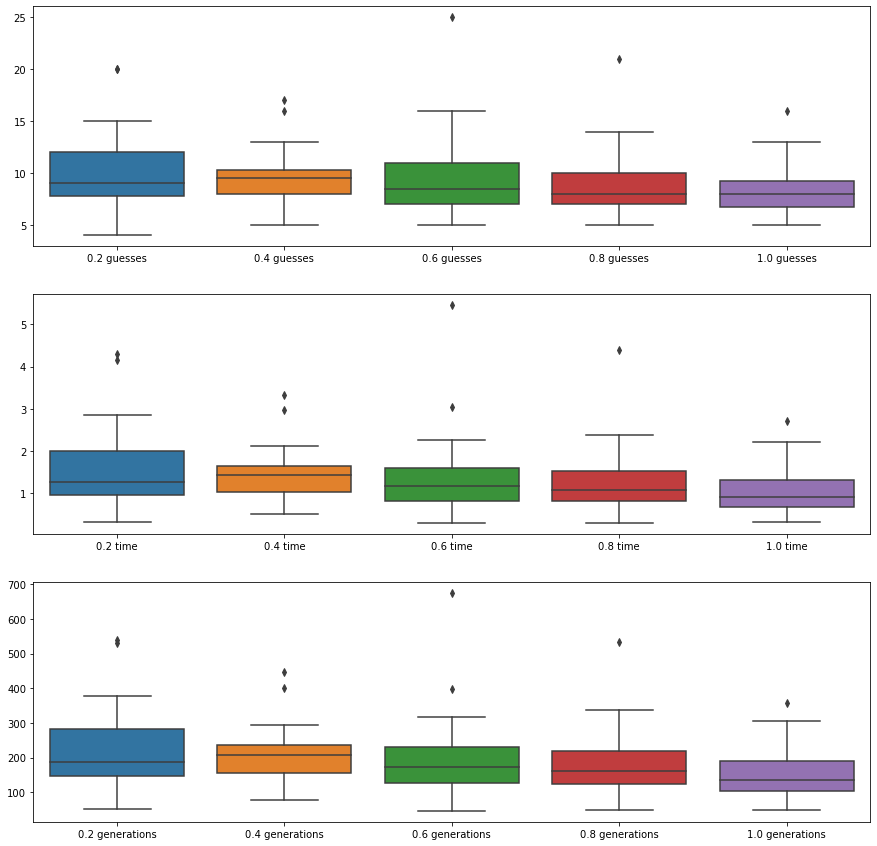

In [66]:
fig, axes = plt.subplots(3, 1, figsize=(15,15))
sns.boxplot(ax = axes[0], data=df_crossover_ideal.iloc[:,::3])
sns.boxplot(ax = axes[1], data=df_crossover_ideal.iloc[:,1::3])
sns.boxplot(ax = axes[2], data=df_crossover_ideal.iloc[:,2::3])

As seen from the data, the best crossover rate is a crossover rate of 1.0 as it has the smallest median and mean for time, generations and guess count.

## Question 4

What is the ideal mutation rate, 0.02, 0.04, 0.06, 0.08 or 0.1? Mutation rate is the probability a random tile in a chromosome is changed to a random number.

In [67]:
df_mutation_ideal = pd.DataFrame()
for i in range(1,6):
    guess_temp, time_temp, gen_temp = simulation(simulation_size = 40, mutation_rate=i/50)
    df_mutation_ideal[str(i/50) + " guesses"] = guess_temp
    df_mutation_ideal[str(i/50) + " time"] = time_temp
    df_mutation_ideal[str(i/50) + " generations"] = gen_temp

Simulation #0
Guess count: 8
Time: 1.0560905933380127
Total generations 158 

Simulation #1
Guess count: 7
Time: 0.8750998973846436
Total generations 136 

Simulation #2
Guess count: 7
Time: 0.8499305248260498
Total generations 133 

Simulation #3
Guess count: 5
Time: 0.6175494194030762
Total generations 101 

Simulation #4
Guess count: 7
Time: 0.8297579288482666
Total generations 129 

Simulation #5
Guess count: 8
Time: 1.068129062652588
Total generations 160 

Simulation #6
Guess count: 9
Time: 1.2473657131195068
Total generations 186 

Simulation #7
Guess count: 9
Time: 1.120157241821289
Total generations 165 

Simulation #8
Guess count: 12
Time: 1.9081287384033203
Total generations 271 

Simulation #9
Guess count: 6
Time: 0.5942375659942627
Total generations 94 

Simulation #10
Guess count: 11
Time: 1.8452115058898926
Total generations 252 

Simulation #11
Guess count: 6
Time: 0.4947237968444824
Total generations 77 

Simulation #12
Guess count: 12
Time: 1.8576781749725342
Total ge

In [68]:
df_mutation_ideal.head()

,0.02 guesses,0.02 time,0.02 generations,0.04 guesses,0.04 time,0.04 generations,0.06 guesses,0.06 time,0.06 generations,0.08 guesses,0.08 time,0.08 generations,0.1 guesses,0.1 time,0.1 generations
0,8,1.056091,158,9,1.118708,162,11,1.648572,235,7,0.804625,124,12,2.119370,282
1,7,0.875100,136,7,0.858948,132,10,1.460444,211,15,2.721859,359,9,1.297871,189
2,7,0.849931,133,9,1.082336,157,12,1.768653,241,9,1.275743,189,5,0.639167,104
3,5,0.617549,101,7,0.708259,103,7,0.731066,111,9,1.323701,185,8,1.062646,158
4,7,0.829758,129,15,2.618588,349,7,0.829413,127,10,1.416511,206,8,0.997399,149


In [70]:
pd.concat([df_mutation_ideal.iloc[:,::3], df_mutation_ideal.iloc[:,1::3], df_mutation_ideal.iloc[:,2::3]]).describe()

,0.02 guesses,0.04 guesses,0.06 guesses,0.08 guesses,0.1 guesses,0.02 time,0.04 time,0.06 time,0.08 time,0.1 time,0.02 generations,0.04 generations,0.06 generations,0.08 generations,0.1 generations
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,8.125000,9.600000,8.900000,9.025000,8.425000,1.073974,1.422467,1.215455,1.274115,1.152000,159.025000,201.52500,175.125000,183.425000,166.200000
std,2.355436,3.240766,2.296039,2.031641,2.934215,0.492995,0.756150,0.501806,0.452193,0.699107,66.575767,93.28918,65.584233,57.998624,84.717086
min,3.000000,5.000000,4.000000,4.000000,5.000000,0.181563,0.428389,0.218426,0.234375,0.419322,31.000000,70.00000,37.000000,39.000000,66.000000
25%,6.750000,7.000000,7.000000,8.000000,6.000000,0.714720,0.890603,0.830785,1.023095,0.676461,112.500000,135.00000,126.750000,151.750000,107.250000
50%,8.000000,9.000000,8.000000,9.000000,8.000000,1.017855,1.288116,1.211579,1.263172,1.054038,151.500000,189.00000,176.500000,184.000000,157.000000
75%,10.000000,11.250000,11.000000,10.000000,10.000000,1.423659,1.855485,1.703602,1.465286,1.344002,207.750000,256.25000,231.250000,205.250000,197.250000
max,13.000000,20.000000,13.000000,15.000000,22.000000,2.154765,3.969134,2.065142,2.721859,4.559612,297.000000,497.00000,286.000000,359.000000,553.000000


<AxesSubplot:>

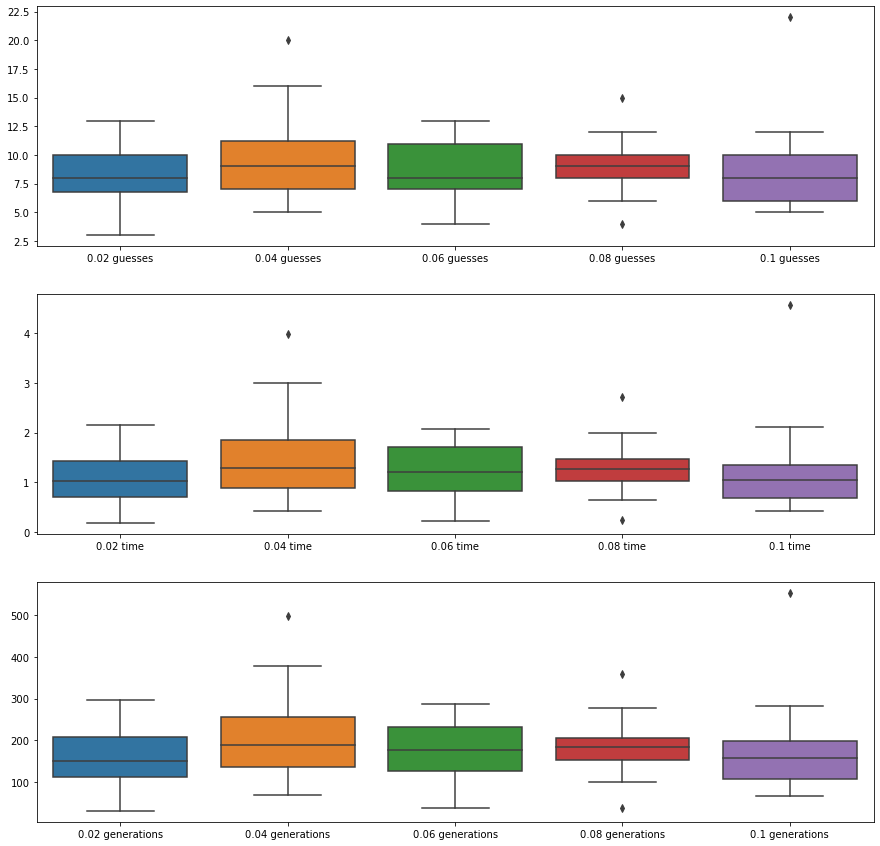

In [71]:
fig, axes = plt.subplots(3, 1, figsize=(15,15))
sns.boxplot(ax = axes[0], data=df_mutation_ideal.iloc[:,::3])
sns.boxplot(ax = axes[1], data=df_mutation_ideal.iloc[:,1::3])
sns.boxplot(ax = axes[2], data=df_mutation_ideal.iloc[:,2::3])

As we see from the data, a mutation rate of 0.02 is ideal as it has the lowest mean and median guesses, generations and time. However, a mutation rate of 0.1 only performs slightly worse but has a smaller interquartile range, making a mutation rate of 0.1 to return more consistent results.

## Question 5

How does the GA perform with different code lengths?

In [72]:
df_code_length = pd.DataFrame()
for i in range(3,6):
    guess_temp, time_temp, gen_temp = simulation(simulation_size = 100, code_length=i)
    df_code_length[str(i) + " guesses"] = guess_temp
    df_code_length[str(i) + " time"] = time_temp
    df_code_length[str(i) + " generations"] = gen_temp

Simulation #0
Guess count: 4
Time: 0.19951653480529785
Total generations 36 

Simulation #1
Guess count: 8
Time: 0.8178060054779053
Total generations 133 

Simulation #2
Guess count: 6
Time: 0.4256556034088135
Total generations 72 

Simulation #3
Guess count: 8
Time: 1.089529275894165
Total generations 181 

Simulation #4
Guess count: 9
Time: 1.2040035724639893
Total generations 195 

Simulation #5
Guess count: 4
Time: 0.05120420455932617
Total generations 11 

Simulation #6
Guess count: 4
Time: 0.2245042324066162
Total generations 40 

Simulation #7
Guess count: 5
Time: 0.38947319984436035
Total generations 67 

Simulation #8
Guess count: 4
Time: 0.19341015815734863
Total generations 35 

Simulation #9
Guess count: 5
Time: 0.26564836502075195
Total generations 46 

Simulation #10
Guess count: 4
Time: 0.39157819747924805
Total generations 68 

Simulation #11
Guess count: 4
Time: 0.18768715858459473
Total generations 34 

Simulation #12
Guess count: 4
Time: 0.23682522773742676
Total gen

In [73]:
df_code_length.head()

,3 guesses,3 time,3 generations,4 guesses,4 time,4 generations,5 guesses,5 time,5 generations
0,4,0.199517,36,5,0.330332,55,7,0.753489,114
1,8,0.817806,133,6,0.440918,71,11,1.619971,228
2,6,0.425656,72,6,0.576030,94,7,0.764636,116
3,8,1.089529,181,7,0.799975,126,9,1.431542,218
4,9,1.204004,195,8,0.951813,147,8,1.081970,163


In [74]:
pd.concat([df_code_length.iloc[:,::3], df_code_length.iloc[:,1::3], df_code_length.iloc[:,2::3]]).describe()

,3 guesses,4 guesses,5 guesses,3 time,4 time,5 time,3 generations,4 generations,5 generations
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,6.150000,6.560000,8.390000,0.574612,0.681997,1.119355,95.240000,108.17000,162.590000
std,1.585127,1.782746,2.304563,0.315025,0.377744,0.520394,49.715782,55.04306,68.755914
min,3.000000,3.000000,5.000000,0.051204,0.098100,0.317875,11.000000,18.00000,52.000000
25%,5.000000,6.000000,7.000000,0.370489,0.441216,0.753764,64.000000,71.75000,113.500000
50%,6.000000,6.000000,8.000000,0.477704,0.625235,1.037711,78.000000,101.00000,155.000000
75%,7.000000,7.000000,10.000000,0.763330,0.831313,1.510660,124.250000,133.25000,219.000000
max,11.000000,16.000000,15.000000,1.571744,2.804840,2.680200,249.000000,396.00000,356.000000


<AxesSubplot:>

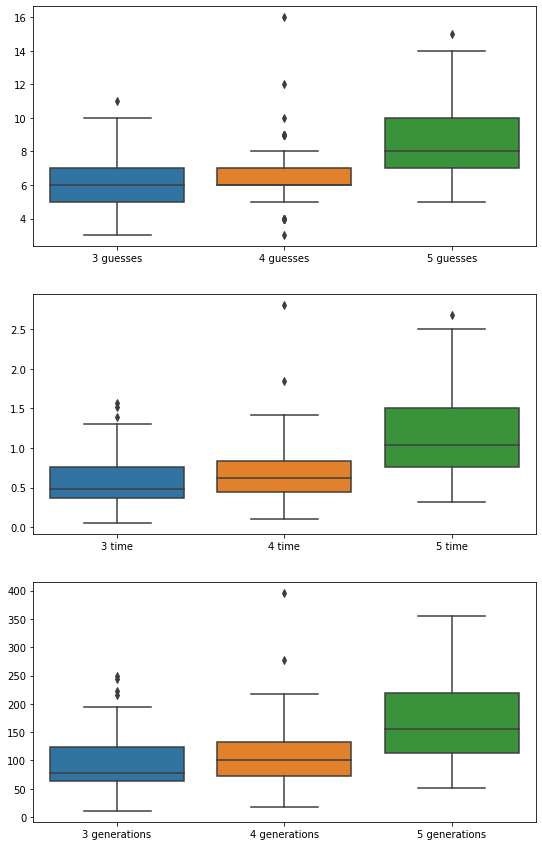

In [75]:
fig, axes = plt.subplots(3, 1, figsize=(9,15))
sns.boxplot(ax = axes[0], data=df_code_length.iloc[:,::3])
sns.boxplot(ax = axes[1], data=df_code_length.iloc[:,1::3])
sns.boxplot(ax = axes[2], data=df_code_length.iloc[:,2::3])

As seen from the graphs and data above, code lengths of 3 or 4, take the model about 6 guesses. However, for a code length of 5, it takes around 8 guesses. The performance of the model may be worse because of the longer chromosome length leading to less convergence due to more randomness.

## Question 6

Does the algorithm performed better with elitism rate 0.0, 0.05, 0.1, 0.15 or 0.2? The elitism rate is the proportion of the population which will not undergo crossover.

In [76]:
df_elitism = pd.DataFrame()
for i in range(5):
    guess_temp, time_temp, gen_temp = simulation(simulation_size = 40, elitism_rate=i/20)
    df_elitism[str(i/20) + " guesses"] = guess_temp
    df_elitism[str(i/20) + " time"] = time_temp
    df_elitism[str(i/20) + " generations"] = gen_temp

Simulation #0
Guess count: 7
Time: 0.856982946395874
Total generations 131 

Simulation #1
Guess count: 10
Time: 1.4843761920928955
Total generations 217 

Simulation #2
Guess count: 5
Time: 0.46533942222595215
Total generations 76 

Simulation #3
Guess count: 11
Time: 1.7338602542877197
Total generations 251 

Simulation #4
Guess count: 7
Time: 0.9364025592803955
Total generations 145 

Simulation #5
Guess count: 8
Time: 0.8451483249664307
Total generations 126 

Simulation #6
Guess count: 8
Time: 0.9885365962982178
Total generations 150 

Simulation #7
Guess count: 9
Time: 1.2966418266296387
Total generations 191 

Simulation #8
Guess count: 7
Time: 1.0199439525604248
Total generations 159 

Simulation #9
Guess count: 6
Time: 0.3906111717224121
Total generations 61 

Simulation #10
Guess count: 11
Time: 1.884498119354248
Total generations 272 

Simulation #11
Guess count: 7
Time: 0.889146089553833
Total generations 137 

Simulation #12
Guess count: 7
Time: 0.7728321552276611
Total ge

In [77]:
df_elitism.head()

,0.0 guesses,0.0 time,0.0 generations,0.05 guesses,0.05 time,0.05 generations,0.1 guesses,0.1 time,0.1 generations,0.15 guesses,0.15 time,0.15 generations,0.2 guesses,0.2 time,0.2 generations
0,7,0.856983,131,5,0.367843,67,10,1.190881,219,17,2.543684,435,13,1.471937,298
1,10,1.484376,217,8,0.927710,157,7,0.660273,128,17,2.507860,433,31,5.777661,861
2,5,0.465339,76,9,1.049307,171,5,0.329841,68,11,1.249218,238,23,3.758432,626
3,11,1.733860,251,10,1.408359,229,11,1.382678,246,11,1.302060,248,6,0.438340,111
4,7,0.936403,145,9,1.164927,191,10,1.245049,228,9,1.013179,199,13,1.588636,337


In [78]:
pd.concat([df_elitism.iloc[:,::3], df_elitism.iloc[:,1::3], df_elitism.iloc[:,2::3]]).describe()

,0.0 guesses,0.05 guesses,0.1 guesses,0.15 guesses,0.2 guesses,0.0 time,0.05 time,0.1 time,0.15 time,0.2 time,0.0 generations,0.05 generations,0.1 generations,0.15 generations,0.2 generations
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,7.950000,8.500000,9.650000,10.925000,12.450000,1.028969,1.054257,1.160294,1.318179,1.566133,153.050000,172.600000,206.550000,245.900000,298.650000
std,1.973543,2.396579,3.408511,3.276861,6.667756,0.458190,0.478768,0.680871,0.620599,1.433628,62.553751,69.685668,102.685966,100.741813,201.878937
min,5.000000,5.000000,5.000000,5.000000,4.000000,0.390611,0.367843,0.208083,0.302742,0.145609,61.000000,67.000000,43.000000,69.000000,40.000000
25%,7.000000,6.750000,7.000000,8.750000,8.000000,0.721876,0.649074,0.670804,0.849082,0.751073,110.500000,110.000000,131.000000,176.750000,177.500000
50%,7.000000,8.000000,9.000000,11.000000,10.500000,0.927780,0.990370,0.981683,1.271626,1.084818,142.000000,164.000000,183.500000,243.500000,241.000000
75%,9.000000,10.000000,11.000000,12.000000,14.000000,1.304372,1.378023,1.389125,1.549233,1.719253,192.000000,223.250000,250.250000,293.250000,351.000000
max,13.000000,14.000000,19.000000,17.000000,35.000000,2.124575,2.198391,3.146023,2.543684,7.134517,295.000000,329.000000,476.000000,439.000000,1004.000000


<AxesSubplot:>

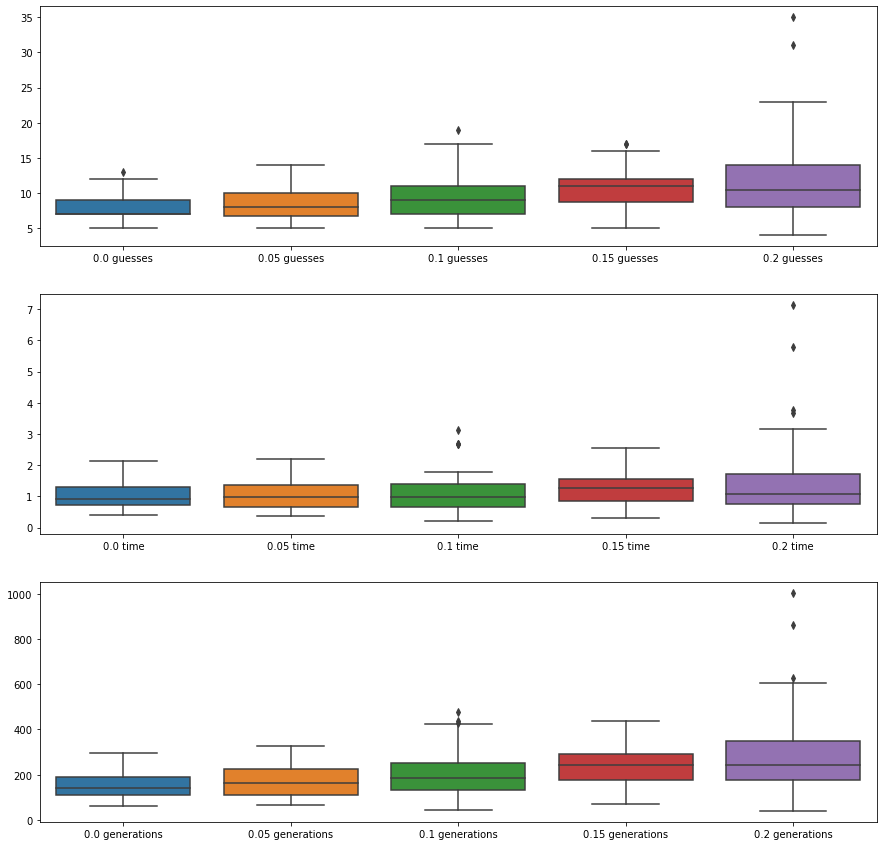

In [97]:
fig, axes = plt.subplots(3, 1, figsize=(15,15))
sns.boxplot(ax = axes[0], data=df_elitism.iloc[:,::3])
sns.boxplot(ax = axes[1], data=df_elitism.iloc[:,1::3])
sns.boxplot(ax = axes[2], data=df_elitism.iloc[:,2::3])

We see that, the algorithm performs better without elitism as the simulation with no elitism has the smallest mean and median guesses, time and generations.

## Conclusion

In conclusion, the best selection method is roulette wheel selection, the best crossover method is one point crossover, the ideal crossover rate is 1.0, the ideal mutation rate is 0.02, the GA's performance is worse for code length of 5, and the algorithm works better without elitism

I agree with the conclusions stated by the researchers about how this GA is faster than metaheurisitics, however the metaheuristics likely use much less memory and can beat a poorly fine tuned GA model.